#                               __Formula 1 Project - How has the budget cap affected competition between the teams/constructors__

In this notebook, we are going to take a look at the data for two sets of time where the budget cap was/n't introduced to see whether the cap has improved the competition between the constructors. Introduced in 2021 by the FIA, its main goal was to level the playing field by limiting the amount of money teams can spend during a season. The cap is designed to make the sport more competitive by ensuring that all teams operate limited budget. However, the effectiveness of this cap in ensuring a more even playing field has been a subject of debate. By the end of this analysis, we are going to gain insights into whether the budget cap has indeed made F1 racing more competitive and if it has enabled smaller teams to close the gap with the more established ones.

The dataset I'm working with is taken from Kaggle (Formula 1 World Championship (1950 - 2024)), more specifically i created a final table containing data and information from multiple tables from the mentioned dataset.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde
from scipy.stats import f_oneway
from scipy.stats import pearsonr

In [3]:
df=pd.read_csv('C:/Users/Admin/Desktop/datasci/team_performance.csv')

In [4]:
df

,#,year,Team Name,Final Position in Constructor Standings,Final Constructor Points,Final Constructor Wins,Total Podiums,Average Race Finish Position,Total Retirements,Average Qualifying Position,Total Pole Positions
0,1,2016,Mercedes,1,765,19,33,3.476190,3,2.880952,20
1,2,2016,Red Bull,2,468,2,16,5.738095,3,5.523810,1
2,3,2016,Ferrari,3,398,0,11,7.404762,8,5.166667,0
3,4,2016,Force India,4,173,0,2,9.952381,6,8.857143,0
4,5,2016,Williams,5,138,0,1,10.523810,6,9.428571,0
...,...,...,...,...,...,...,...,...,...,...,...
86,87,2024,Alpine F1 Team,6,65,0,2,13.312500,6,14.020833,0
87,88,2024,Haas F1 Team,7,58,0,0,12.395833,5,12.979167,0
88,89,2024,RB F1 Team,8,46,0,0,13.291667,7,12.104167,0
89,90,2024,Williams,9,17,0,0,15.127660,12,14.893617,0


Here we will drop the unnecessary columns and rows we have in this dataset. For the columns,that would be the '#' column since we have no real values in it. For the rows, we will only drop the 'Manor Marussia' row since its final season competing in Formula 1 was in 2016.

In [5]:
df=df.drop(['#'],axis=1)
df=df[df['Team Name'] != 'Manor Marussia']
df

,year,Team Name,Final Position in Constructor Standings,Final Constructor Points,Final Constructor Wins,Total Podiums,Average Race Finish Position,Total Retirements,Average Qualifying Position,Total Pole Positions
0,2016,Mercedes,1,765,19,33,3.476190,3,2.880952,20
1,2016,Red Bull,2,468,2,16,5.738095,3,5.523810,1
2,2016,Ferrari,3,398,0,11,7.404762,8,5.166667,0
3,2016,Force India,4,173,0,2,9.952381,6,8.857143,0
4,2016,Williams,5,138,0,1,10.523810,6,9.428571,0
...,...,...,...,...,...,...,...,...,...,...
86,2024,Alpine F1 Team,6,65,0,2,13.312500,6,14.020833,0
87,2024,Haas F1 Team,7,58,0,0,12.395833,5,12.979167,0
88,2024,RB F1 Team,8,46,0,0,13.291667,7,12.104167,0
89,2024,Williams,9,17,0,0,15.127660,12,14.893617,0


In [6]:
df.isnull().sum()

year                                       0
Team Name                                  0
Final Position in Constructor Standings    0
Final Constructor Points                   0
Final Constructor Wins                     0
Total Podiums                              0
Average Race Finish Position               0
Total Retirements                          0
Average Qualifying Position                0
Total Pole Positions                       0
dtype: int64

In [7]:
df[df['Team Name']=='Mercedes']

,year,Team Name,Final Position in Constructor Standings,Final Constructor Points,Final Constructor Wins,Total Podiums,Average Race Finish Position,Total Retirements,Average Qualifying Position,Total Pole Positions
0,2016,Mercedes,1,765,19,33,3.476190,3,2.880952,20
11,2017,Mercedes,1,668,12,26,3.175000,1,3.200000,15
21,2018,Mercedes,1,655,11,25,3.857143,3,3.000000,13
31,2019,Mercedes,1,739,15,32,3.238095,2,2.642857,10
41,2020,Mercedes,1,573,13,25,3.735294,1,2.000000,15
51,2021,Mercedes,1,613,9,28,5.409091,5,2.954545,11
63,2022,Mercedes,3,515,1,17,5.522727,3,6.431818,1
72,2023,Mercedes,2,409,0,8,7.136364,6,6.431818,1
84,2024,Mercedes,4,468,4,9,6.854167,5,6.833333,3


Throughout the years, several teams have been changing their names due to rebranding, ownership changes or sponsorship deals. In order to analyze it better, we are going to replace the old names of the teams with their current names.

In [8]:
df['Team Name'].unique()

array(['Mercedes', 'Red Bull', 'Ferrari', 'Force India', 'Williams',
       'McLaren', 'Toro Rosso', 'Haas F1 Team', 'Renault', 'Sauber',
       'Racing Point', 'Alfa Romeo', 'AlphaTauri', 'Alpine F1 Team',
       'Aston Martin', 'RB F1 Team'], dtype=object)

In [9]:
team_name_mapping={
    'Toro Rosso': 'Racing Bulls',
    'AlphaTauri': 'Racing Bulls',
    'RB F1 Team': 'Racing Bulls',
    'Racing Point': 'Aston Martin',
    'Force India': 'Aston Martin',
    'Haas F1 Team': 'Haas',
    'Alfa Romeo': 'Sauber',
    'Alpine F1 Team': 'Alpine',
    'Renault': 'Alpine'
}

df['Team Name']=df['Team Name'].replace(team_name_mapping)

df['Team Name'].unique()


array(['Mercedes', 'Red Bull', 'Ferrari', 'Aston Martin', 'Williams',
       'McLaren', 'Racing Bulls', 'Haas', 'Alpine', 'Sauber'],
      dtype=object)

To make the analysis clearer, we will split the main dataset into two subsets: pre-cap (2016-2019) and post-cap (2021-2024). The 2020 season has been excluded from the analysis due to the impact of the COVID-19 pandemic, which caused the cancellation of many races and resulted in incomplete data. This makes the 2020 season unsuitable for a fair comparison.

In [10]:
pre_cap_df=df[df['year'].between(2016,2019)]
post_cap_df=df[df['year'].between(2021,2024)]
pre_cap_df

,year,Team Name,Final Position in Constructor Standings,Final Constructor Points,Final Constructor Wins,Total Podiums,Average Race Finish Position,Total Retirements,Average Qualifying Position,Total Pole Positions
0,2016,Mercedes,1,765,19,33,3.476190,3,2.880952,20
1,2016,Red Bull,2,468,2,16,5.738095,3,5.523810,1
2,2016,Ferrari,3,398,0,11,7.404762,8,5.166667,0
3,2016,Aston Martin,4,173,0,2,9.952381,6,8.857143,0
4,2016,Williams,5,138,0,1,10.523810,6,9.428571,0
5,2016,McLaren,6,76,0,0,12.714286,10,12.536585,0
6,2016,Racing Bulls,7,63,0,0,13.166667,10,12.380952,0
7,2016,Haas,8,29,0,0,14.452381,10,13.619048,0
8,2016,Alpine,9,8,0,0,15.523810,11,17.175000,0
9,2016,Sauber,10,2,0,0,15.928571,9,18.951220,0


### Budget Data Sources and Estimations

The budgets for Formula 1 teams have proven difficult to gather, as there is no official way to determine the exact figures. Instead, estimates are available, which carry a margin of error of approximately ±5 million euros. All budget figures provided are in millions of euros.

Below are the sources for the estimated budgets for each year:

- **2016**: [Autosport - How much did Formula 1 teams spend in 2016](https://www.autosport.com/f1/news/how-much-did-formula-1-teams-spend-in-2016-5109312/5109312/)
- **2017**: [Motorsport Total - Formula 1 Budgets in 2017](https://www.motorsport-total.com/formel-1/fotos-videos/fotostrecken/die-budgets-der-formel-1-teams-2017/1720)
- **2018**: [RaceFans - How much F1 teams spent in 2018 - Part One](https://www.racefans.net/2018/12/19/how-much-f1-teams-spent-race-2018-part-one/)
  [RaceFans - How much F1 teams spent in 2018 - Part Two](https://www.racefans.net/2018/12/26/the-cost-of-f1-revealed-how-much-teams-spent-in-2018-part-two/)
- **2019**: [RaceFans - The cost of F1 2019 - Team Budgets Analysed - Part One](https://www.racefans.net/2019/12/27/the-cost-of-f1-2019-team-budgets-analysed-part-one/)
  [RaceFans - The cost of F1 2019 - Part Two - What the Top Teams Spent](https://www.racefans.net/2020/01/02/the-cost-of-f1-2019-part-two-what-the-top-teams-spent/)


In [11]:
budget_data={
    (2016, 'Mercedes'): 314.04,
    (2016, 'Red Bull'): 254.78,
    (2016, 'Ferrari'): 391.05,
    (2016, 'McLaren'): 219.23,
    (2016, 'Alpine'): 177.75,
    (2016, 'Aston Martin'): 106.65,
    (2016, 'Haas'): 118.50,
    (2016, 'Racing Bulls'): 118.50,
    (2016, 'Sauber'): 112.58,
    (2016, 'Williams'): 124.43,
    (2017, 'Mercedes'): 310.0,
    (2017, 'Red Bull'): 250.0,
    (2017, 'Ferrari'): 260.0,
    (2017, 'McLaren'): 212.0,
    (2017, 'Alpine'): 172.0,
    (2017, 'Aston Martin'): 103.0,
    (2017, 'Haas'): 115.0,
    (2017, 'Racing Bulls'): 115.0,
    (2017, 'Sauber'): 109.0,
    (2017, 'Williams'): 120.0,
    (2018, 'Mercedes'): 381.08,
    (2018, 'Red Bull'): 295.34,
    (2018, 'Ferrari'): 390.61,
    (2018, 'McLaren'): 209.59,
    (2018, 'Alpine'): 181.0,
    (2018, 'Aston Martin'): 114.32,
    (2018, 'Haas'): 123.86,
    (2018, 'Racing Bulls'): 142.88,
    (2018, 'Sauber'): 128.61,
    (2018, 'Williams'): 142.88,
    (2019, 'Mercedes'): 404.87,
    (2019, 'Red Bull'): 319.08,
    (2019, 'Ferrari'): 414.33,
    (2019, 'McLaren'): 238.12,
    (2019, 'Alpine'): 200.0,
    (2019, 'Aston Martin'): 147.65,
    (2019, 'Haas'): 142.88,
    (2019, 'Racing Bulls'): 147.65,
    (2019, 'Sauber'): 147.65,
    (2019, 'Williams'): 142.88
}

In [12]:
pre_cap_df['Budget']=pre_cap_df.apply(lambda row: budget_data.get((row['year'], row['Team Name']), None), axis=1)
pre_cap_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_12076\690030138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_cap_df['Budget']=pre_cap_df.apply(lambda row: budget_data.get((row['year'], row['Team Name']), None), axis=1)


,year,Team Name,Final Position in Constructor Standings,Final Constructor Points,Final Constructor Wins,Total Podiums,Average Race Finish Position,Total Retirements,Average Qualifying Position,Total Pole Positions,Budget
0,2016,Mercedes,1,765,19,33,3.476190,3,2.880952,20,314.04
1,2016,Red Bull,2,468,2,16,5.738095,3,5.523810,1,254.78
2,2016,Ferrari,3,398,0,11,7.404762,8,5.166667,0,391.05
3,2016,Aston Martin,4,173,0,2,9.952381,6,8.857143,0,106.65
4,2016,Williams,5,138,0,1,10.523810,6,9.428571,0,124.43
5,2016,McLaren,6,76,0,0,12.714286,10,12.536585,0,219.23
6,2016,Racing Bulls,7,63,0,0,13.166667,10,12.380952,0,118.50
7,2016,Haas,8,29,0,0,14.452381,10,13.619048,0,118.50
8,2016,Alpine,9,8,0,0,15.523810,11,17.175000,0,177.75
9,2016,Sauber,10,2,0,0,15.928571,9,18.951220,0,112.58


Here we also add a column named 'Budget Efficiency' to check how teams are dealing with the budget they possess

In [13]:
pre_cap_df['Budget Efficiency'] = pre_cap_df['Final Constructor Points'] / pre_cap_df['Budget']
pre_cap_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_12076\2537355431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_cap_df['Budget Efficiency'] = pre_cap_df['Final Constructor Points'] / pre_cap_df['Budget']


,year,Team Name,Final Position in Constructor Standings,Final Constructor Points,Final Constructor Wins,Total Podiums,Average Race Finish Position,Total Retirements,Average Qualifying Position,Total Pole Positions,Budget,Budget Efficiency
0,2016,Mercedes,1,765,19,33,3.476190,3,2.880952,20,314.04,2.435995
1,2016,Red Bull,2,468,2,16,5.738095,3,5.523810,1,254.78,1.836879
2,2016,Ferrari,3,398,0,11,7.404762,8,5.166667,0,391.05,1.017773
3,2016,Aston Martin,4,173,0,2,9.952381,6,8.857143,0,106.65,1.622128
4,2016,Williams,5,138,0,1,10.523810,6,9.428571,0,124.43,1.109057
5,2016,McLaren,6,76,0,0,12.714286,10,12.536585,0,219.23,0.346668
6,2016,Racing Bulls,7,63,0,0,13.166667,10,12.380952,0,118.50,0.531646
7,2016,Haas,8,29,0,0,14.452381,10,13.619048,0,118.50,0.244726
8,2016,Alpine,9,8,0,0,15.523810,11,17.175000,0,177.75,0.045007
9,2016,Sauber,10,2,0,0,15.928571,9,18.951220,0,112.58,0.017765


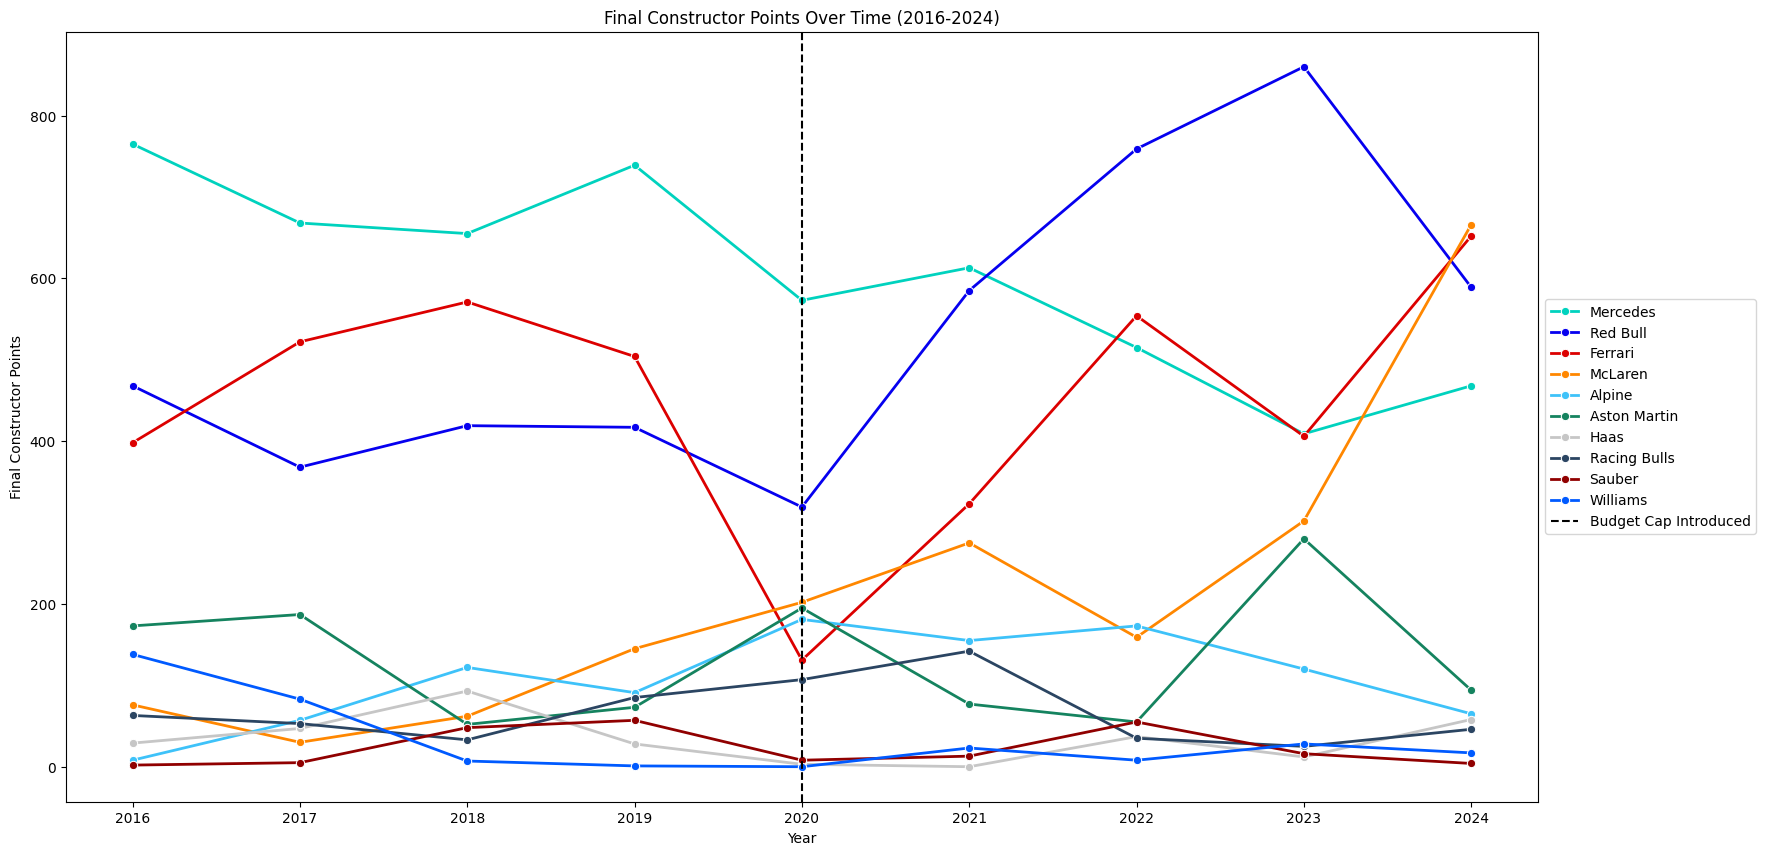

In [14]:
team_colors={
    'Mercedes': '#00D2BE',
    'Red Bull': '#0600EF',
    'Ferrari': '#DC0000',
    'McLaren': '#FF8700',
    'Alpine': '#3EC2F9',
    'Aston Martin': '#15835F',
    'Haas': '#C6C6C6',
    'Racing Bulls': '#2B4562',
    'Sauber': '#900000',
    'Williams': '#005AFF'
}


plt.figure(figsize=(19,10))
for team, color in team_colors.items():
    team_data = df[df['Team Name']== team]
    sns.lineplot(x='year', y='Final Constructor Points', data=team_data, color=color, label=team, linewidth=2, marker='o')
plt.xlabel('Year')
plt.ylabel('Final Constructor Points')
plt.title('Final Constructor Points Over Time (2016-2024)')
plt.axvline(x=2020, color='black', linestyle='--', label='Budget Cap Introduced')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

Analyzing this chart, we can see that the pre-cap period stays pretty stagnant when it comes to the top positions (Mercedes dominates throughout this period, while Ferrari and Red Bull remain the biggiest rivals). On the other hand, we can see that in the post-cap period there are more fluctuations within the highest positions (there are three unique winners since 2020). Another things to point out would be unusually improved results for Racing Bulls in 2021 and Aston Martin in 2023.

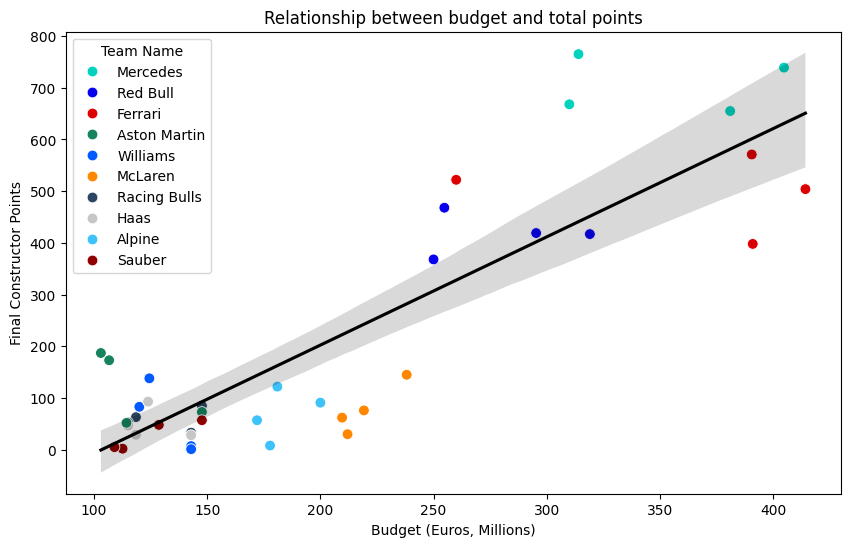

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Budget', y='Final Constructor Points', hue='Team Name', data=pre_cap_df, palette=team_colors, s=60)

sns.regplot(x='Budget', y='Final Constructor Points', data=pre_cap_df, scatter=False, color='black')


plt.title('Relationship between budget and total points')
plt.xlabel('Budget (Euros, Millions)')
plt.ylabel('Final Constructor Points')
plt.show()

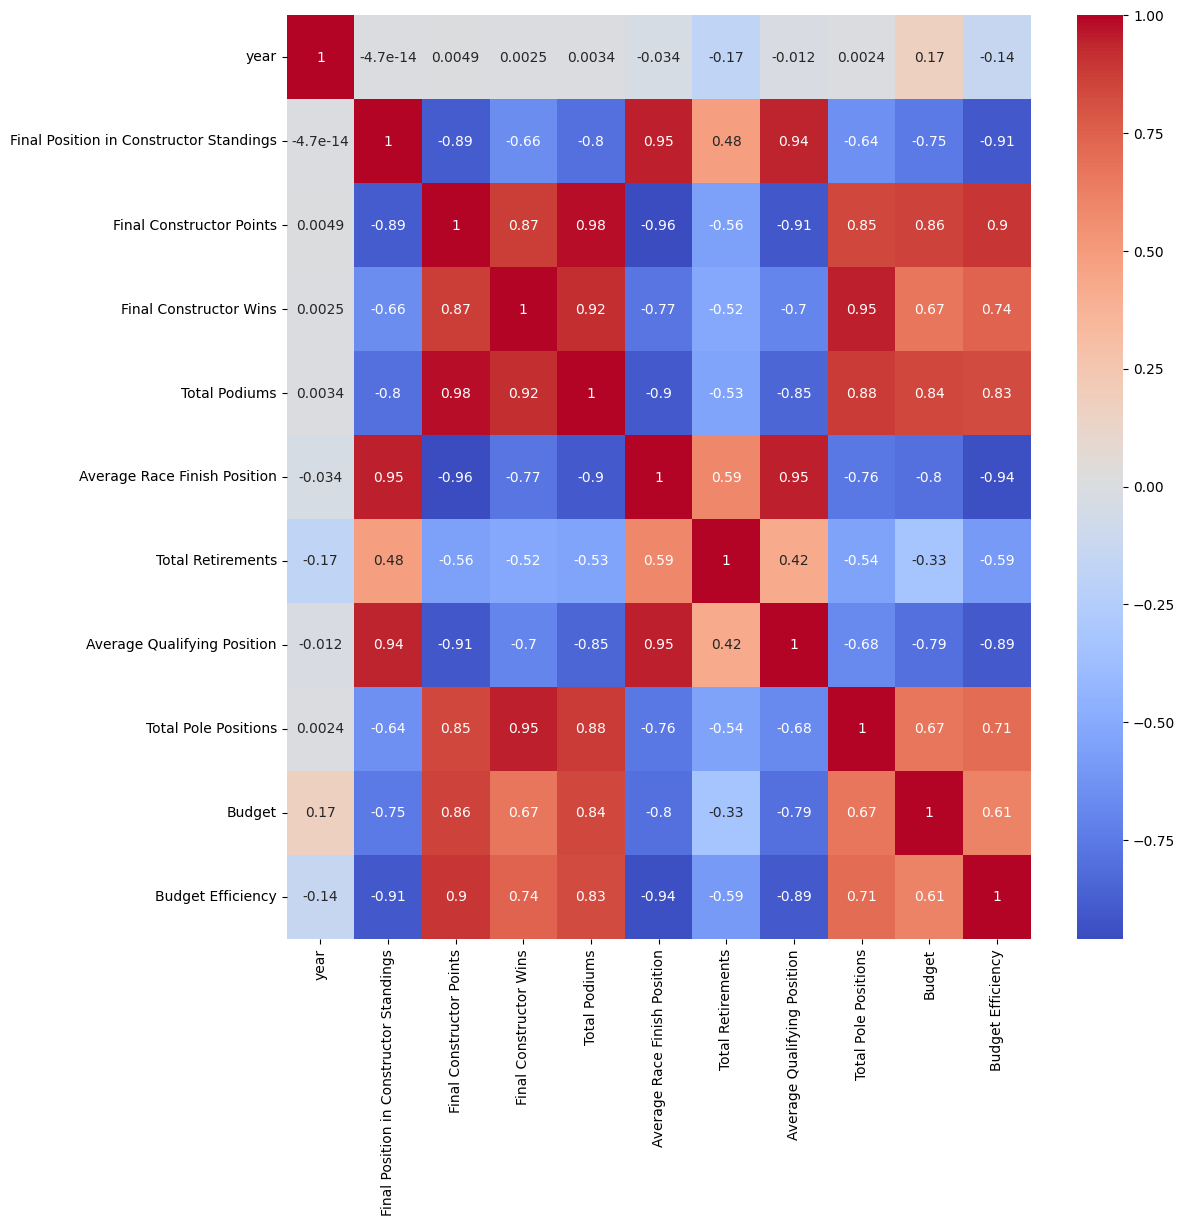

In [16]:
corr_matrix=pre_cap_df.drop(columns=['Team Name'],axis=1).corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

When we take a look at the correlation between the 'Budget' and 'Final Constructor Points' columns, we can see a strong correlation coefficient of **0.86**. This suggests that teams with a higher budget are likely to achieve a higher number of constructor points by the end of the season.


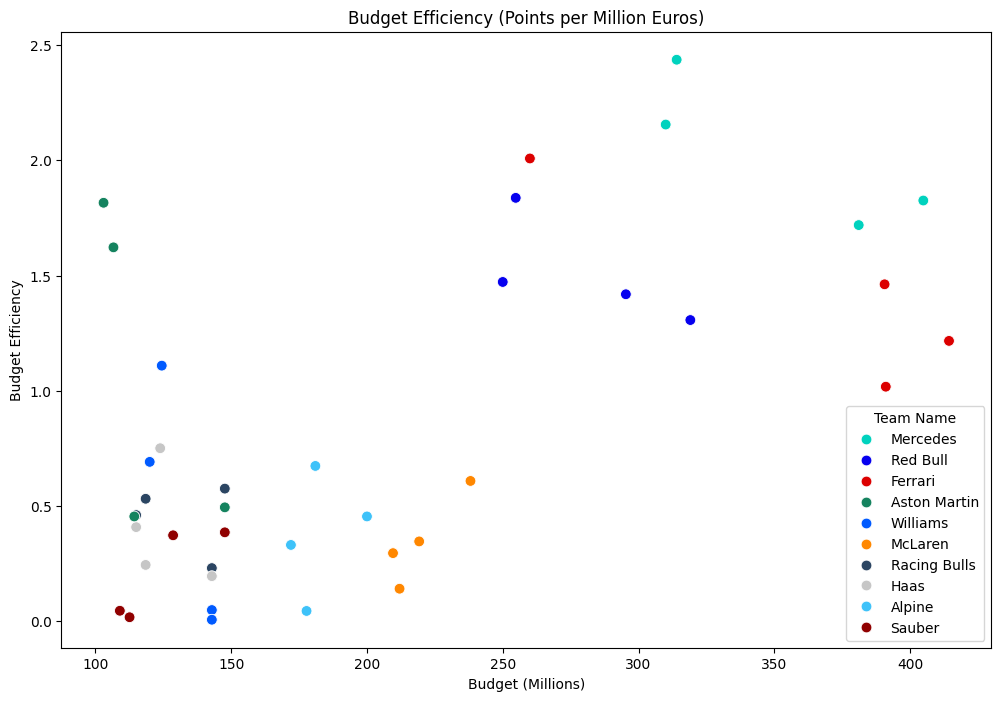

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Budget', y='Budget Efficiency', hue='Team Name', data=pre_cap_df, palette=team_colors, s=60)
plt.title('Budget Efficiency (Points per Million Euros)')
plt.xlabel('Budget (Millions)')
plt.ylabel('Budget Efficiency')
plt.show()

In [18]:
team_avg = pre_cap_df.groupby('Team Name').agg({
    'Budget': 'mean',
    'Final Constructor Points': 'mean'
}).reset_index()

team_avg

,Team Name,Budget,Final Constructor Points
0,Alpine,182.6875,69.50
1,Aston Martin,117.9050,121.25
2,Ferrari,363.9975,498.75
3,Haas,125.0600,49.25
4,McLaren,219.7350,78.25
5,Mercedes,352.4975,706.75
6,Racing Bulls,131.0075,58.50
7,Red Bull,279.8000,418.00
8,Sauber,124.4600,28.00
9,Williams,132.5475,57.25


# Clustering

To gain deeper insights into whether smaller teams have performed better under the budget cap or if larger teams have struggled due to its constraints, we will employ machine learning techniques to categorize the teams into three distinct groups: Top, Mid, and Lower Tier. This clustering approach will help us understand how teams of different budget sizes have fared relative to each other. By grouping the teams based on their competitive performance, we can better assess the impact of the budget cap on teams with varying financial resources.


In [19]:
features= ['Budget', 'Final Constructor Points']
X= team_avg[features]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

kmeans= KMeans(n_clusters=3, random_state=42, n_init=10)
team_avg['Cluster']= kmeans.fit_predict(X_scaled)

centroids=kmeans.cluster_centers_

sorted_clusters=np.argsort(-centroids[:,1])

cluster_names={sorted_clusters[0]: 'Top Tier', sorted_clusters[1]: 'Mid Tier', sorted_clusters[2]: 'Lower Tier'}
team_avg['Cluster'] = team_avg['Cluster'].map(cluster_names)

team_avg

,Team Name,Budget,Final Constructor Points,Cluster
0,Alpine,182.6875,69.50,Mid Tier
1,Aston Martin,117.9050,121.25,Lower Tier
2,Ferrari,363.9975,498.75,Top Tier
3,Haas,125.0600,49.25,Lower Tier
4,McLaren,219.7350,78.25,Mid Tier
5,Mercedes,352.4975,706.75,Top Tier
6,Racing Bulls,131.0075,58.50,Lower Tier
7,Red Bull,279.8000,418.00,Top Tier
8,Sauber,124.4600,28.00,Lower Tier
9,Williams,132.5475,57.25,Lower Tier


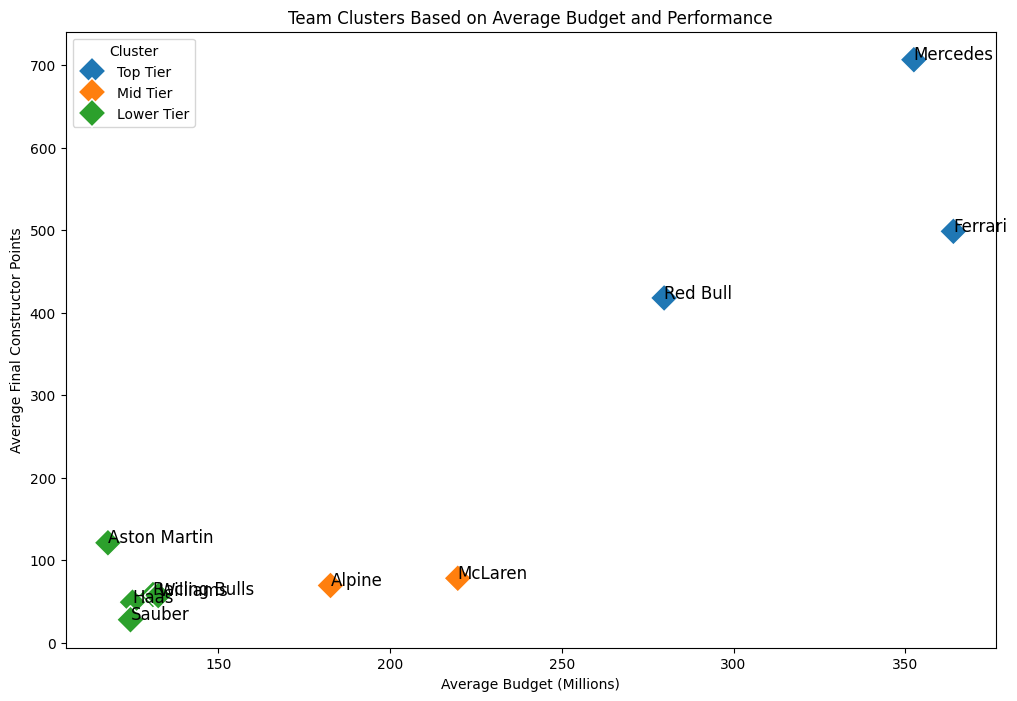

In [20]:
tier_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
tier_order = ['Top Tier', 'Mid Tier', 'Lower Tier']

plt.figure(figsize=(12,8))
sns.scatterplot(x='Budget', y='Final Constructor Points', hue='Cluster', data=team_avg, marker='D', palette=tier_colors, hue_order=tier_order, s=200)

for i, row in team_avg.iterrows():
    plt.text(row['Budget'], row['Final Constructor Points'], row['Team Name'], fontsize=12)


        
plt.title('Team Clusters Based on Average Budget and Performance')
plt.xlabel('Average Budget (Millions)')
plt.ylabel('Average Final Constructor Points')
plt.legend(title='Cluster')
plt.show()

In [21]:
team_tier_dict = team_avg.set_index('Team Name')['Cluster'].to_dict()

post_cap_df['Tier'] = post_cap_df['Team Name'].map(team_tier_dict)
pre_cap_df['Tier'] = pre_cap_df['Team Name'].map(team_tier_dict)


post_cap_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_12076\977166557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_cap_df['Tier'] = post_cap_df['Team Name'].map(team_tier_dict)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12076\977166557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_cap_df['Tier'] = pre_cap_df['Team Name'].map(team_tier_dict)


,year,Team Name,Final Position in Constructor Standings,Final Constructor Points,Final Constructor Wins,Total Podiums,Average Race Finish Position,Total Retirements,Average Qualifying Position,Total Pole Positions,Tier
51,2021,Mercedes,1,613,9,28,5.409091,5,2.954545,11,Top Tier
52,2021,Red Bull,2,585,11,23,5.840909,6,4.613636,8,Top Tier
53,2021,Ferrari,3,323,0,5,7.113636,2,7.386364,2,Top Tier
54,2021,McLaren,4,275,1,5,7.795455,2,8.113636,1,Mid Tier
55,2021,Alpine,5,155,1,2,10.250000,5,11.000000,0,Mid Tier
56,2021,Racing Bulls,6,142,0,1,11.272727,8,9.818182,0,Lower Tier
57,2021,Aston Martin,7,77,0,1,12.000000,8,12.636364,0,Lower Tier
58,2021,Williams,8,23,0,1,14.727273,11,14.522727,0,Lower Tier
59,2021,Sauber,9,13,0,0,13.204545,3,15.022727,0,Lower Tier
60,2021,Haas,10,0,0,0,17.386364,9,18.906977,0,Lower Tier


In [22]:
pre_cap_df[['year','Team Name', 'Tier', 'Final Position in Constructor Standings']][pre_cap_df['Final Position in Constructor Standings']==1]

,year,Team Name,Tier,Final Position in Constructor Standings
0,2016,Mercedes,Top Tier,1
11,2017,Mercedes,Top Tier,1
21,2018,Mercedes,Top Tier,1
31,2019,Mercedes,Top Tier,1


In [23]:
post_cap_df[['year','Team Name', 'Tier', 'Final Position in Constructor Standings']][post_cap_df['Final Position in Constructor Standings']==1]

,year,Team Name,Tier,Final Position in Constructor Standings
51,2021,Mercedes,Top Tier,1
61,2022,Red Bull,Top Tier,1
71,2023,Red Bull,Top Tier,1
81,2024,McLaren,Mid Tier,1


Following these last two tables, we can tell that after eight seasons (including the 2020 one), a "Mid Tier" constructor has finally won a championship! Although this can't fully determine whether the cap worked, it's a signal that some shifts of bigger scale have happened and will likely occur in the future. In the pre-cap period, there has been only one winner, while in the post-cap period we have three different teams from two different groupings. Further analysis and insights can be seen further in this notebook.

# Visualizations/Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_12076\3843389127.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Final Constructor Points', y='Team Name', data=pre_cap_points, palette=team_colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12076\3843389127.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Final Constructor Points', y='Team Name', data=post_cap_points, palette=team_colors)


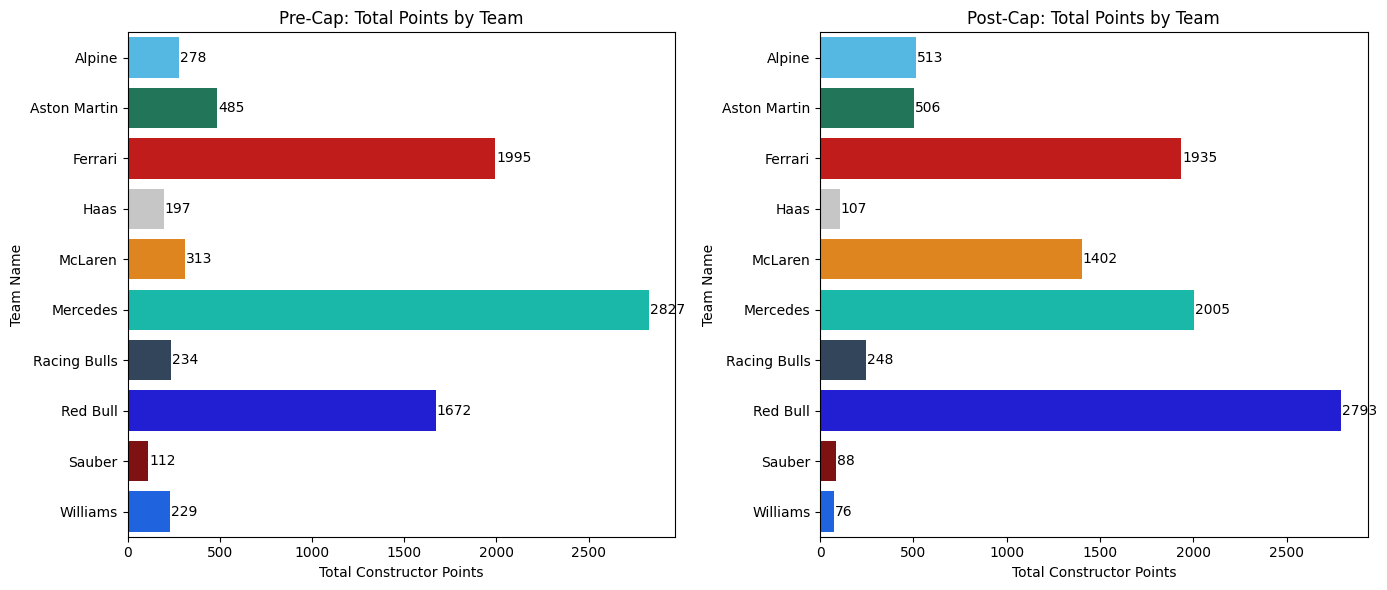

In [24]:
plt.figure(figsize=(14, 6))

pre_cap_points = pre_cap_df.groupby('Team Name')['Final Constructor Points'].sum().reset_index()
post_cap_points = post_cap_df.groupby('Team Name')['Final Constructor Points'].sum().reset_index()

plt.subplot(1, 2, 1)
sns.barplot(x='Final Constructor Points', y='Team Name', data=pre_cap_points, palette=team_colors)
plt.title('Pre-Cap: Total Points by Team')
plt.xlabel('Total Constructor Points')
plt.ylabel('Team Name')

for i, row in pre_cap_points.iterrows():
    plt.text(row['Final Constructor Points'] + 5, i, str(row['Final Constructor Points']),
             color='black', ha="left", va="center", fontsize=10)
plt.subplot(1, 2, 2)
sns.barplot(x='Final Constructor Points', y='Team Name', data=post_cap_points, palette=team_colors)
plt.title('Post-Cap: Total Points by Team')
plt.xlabel('Total Constructor Points')
plt.ylabel('Team Name')

for i, row in post_cap_points.iterrows():
    plt.text(row['Final Constructor Points'] + 5, i, str(row['Final Constructor Points']),
             color='black', ha="left", va="center", fontsize=10)

plt.tight_layout()
plt.show()

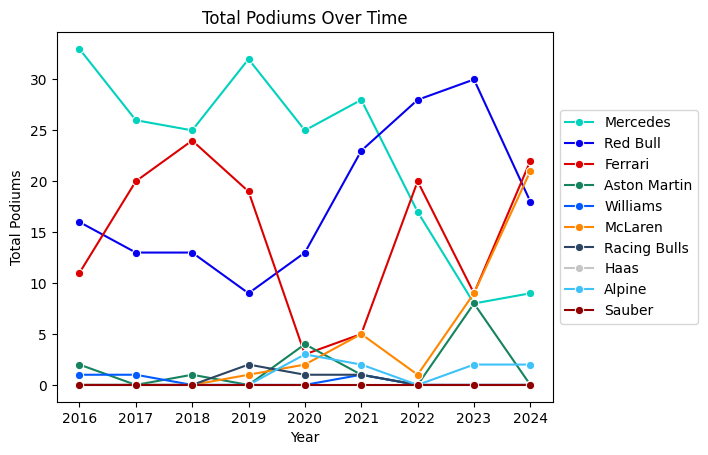

In [25]:
plt.subplot(1,1,1)
sns.lineplot(data=df, x='year', y='Total Podiums', hue='Team Name', marker='o', palette=team_colors)
plt.title('Total Podiums Over Time')
plt.ylabel('Total Podiums')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

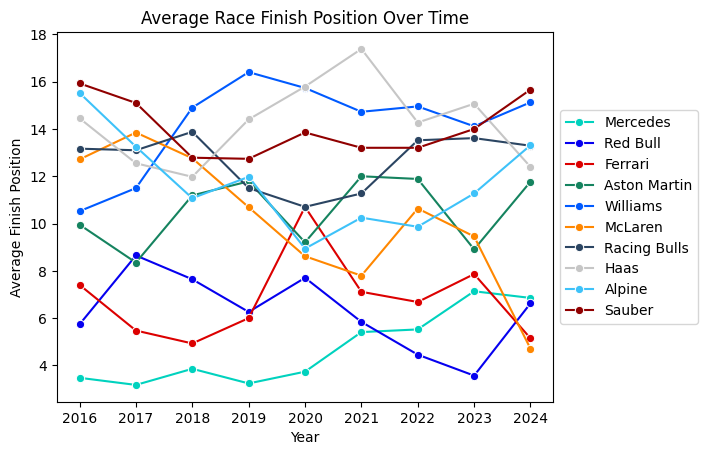

In [26]:
plt.subplot(1,1,1)
sns.lineplot(data=df, x='year', y='Average Race Finish Position', hue='Team Name', marker='o', palette=team_colors)
plt.title('Average Race Finish Position Over Time')
plt.ylabel('Average Finish Position')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

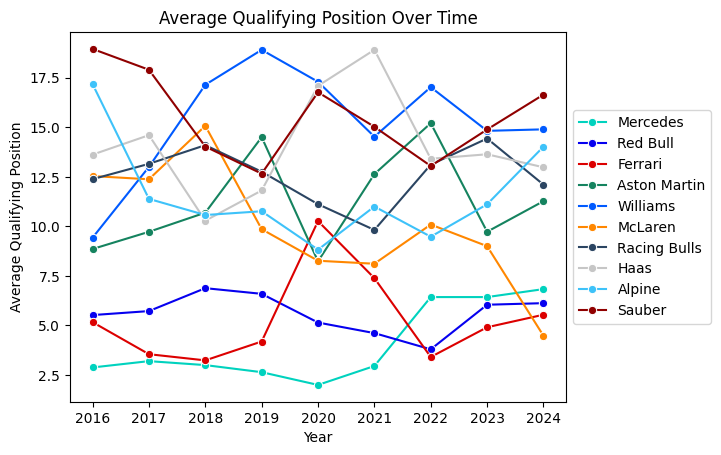

In [27]:
plt.subplot(1,1,1)
sns.lineplot(data=df, x='year', y='Average Qualifying Position', hue='Team Name', marker='o', palette=team_colors)
plt.title('Average Qualifying Position Over Time')
plt.ylabel('Average Qualifying Position')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

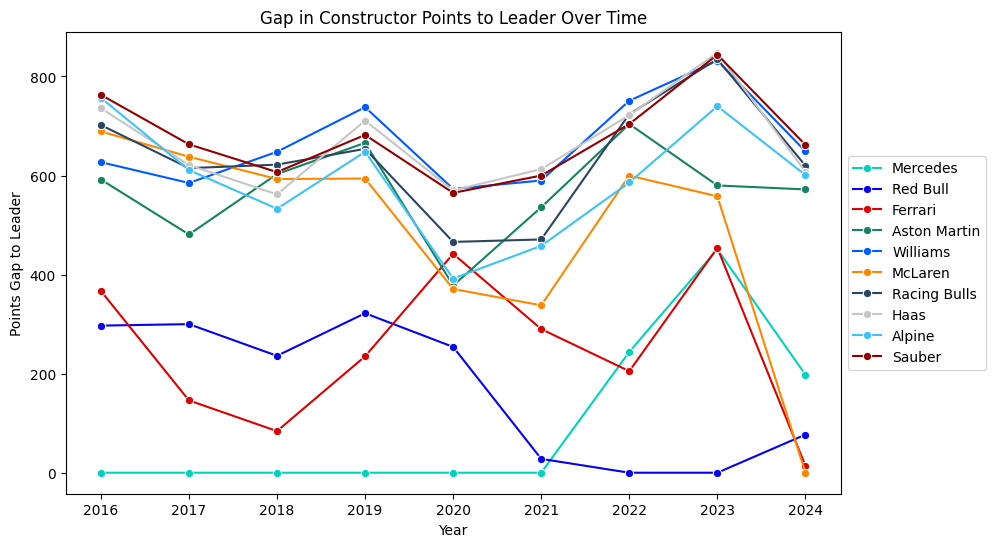

In [28]:
df['Points Gap to Leader'] = df.groupby('year')['Final Constructor Points'].transform(lambda x: x.max() - x)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Points Gap to Leader', hue='Team Name', marker='o', palette=team_colors)
plt.title('Gap in Constructor Points to Leader Over Time')
plt.ylabel('Points Gap to Leader')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

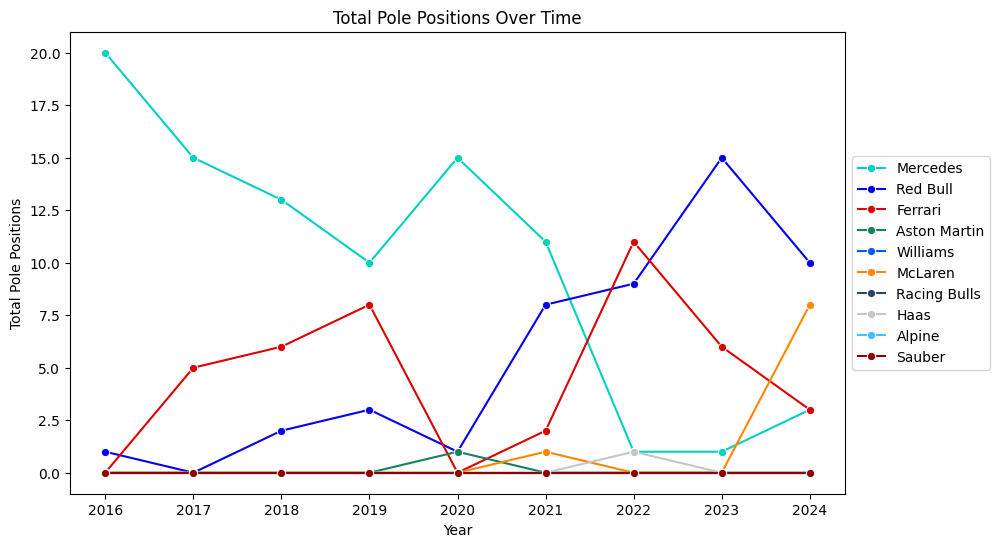

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Total Pole Positions', hue='Team Name', palette=team_colors, marker='o')
plt.title('Total Pole Positions Over Time')
plt.ylabel('Total Pole Positions')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

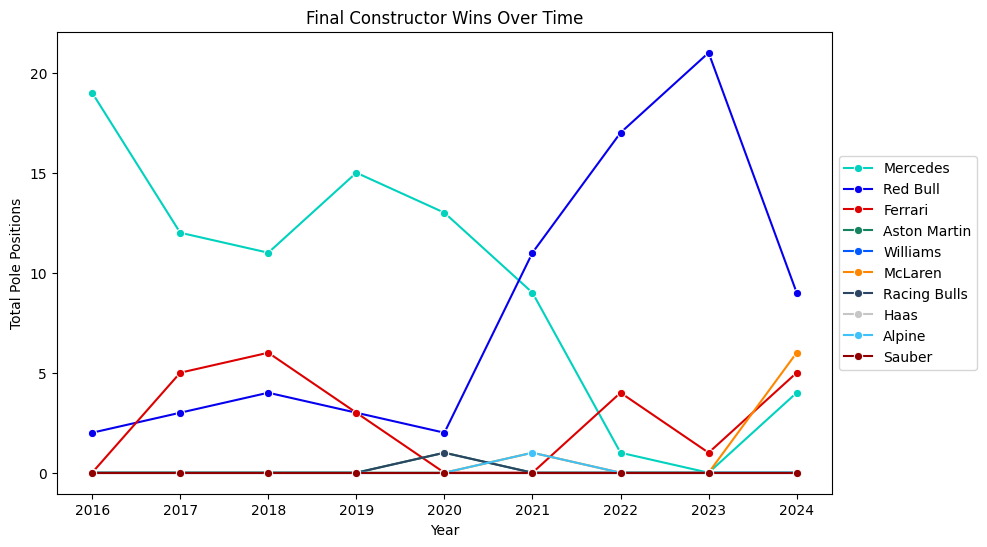

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Final Constructor Wins', hue='Team Name', palette=team_colors, marker='o')
plt.title('Final Constructor Wins Over Time')
plt.ylabel('Total Pole Positions')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

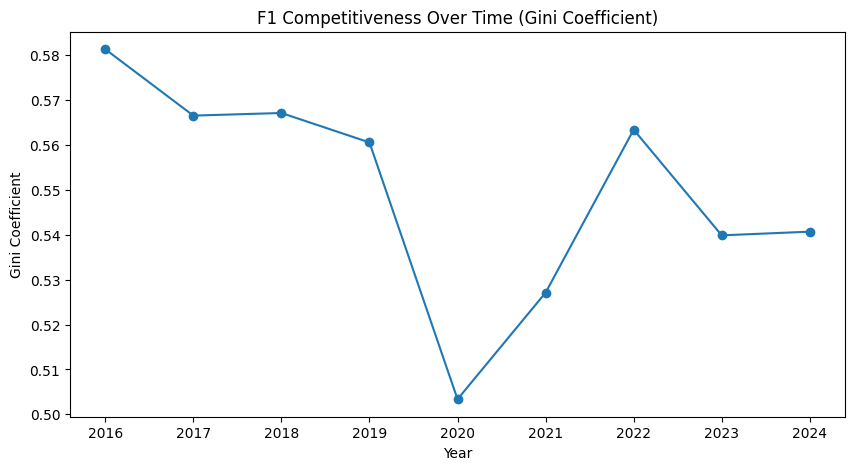

In [32]:
def gini(points):
    sorted_points = np.sort(points)
    n = len(sorted_points)
    if n == 0:
        return np.nan  
    gini_index = (2 * np.sum((np.arange(1, n+1) * sorted_points)) / (n * np.sum(sorted_points))) - ((n + 1) / n)
    return gini_index

gini_per_year = df.groupby("year")["Final Constructor Points"].apply(gini).reset_index()
gini_per_year

gini_per_year.rename(columns={"Final Constructor Points": "Gini Coefficient"}, inplace=True)

plt.figure(figsize=(10,5))
plt.plot(gini_per_year["year"], gini_per_year["Gini Coefficient"], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Gini Coefficient")
plt.title("F1 Competitiveness Over Time (Gini Coefficient)")
plt.show()

In [33]:
correlation = gini_per_year["Gini Coefficient"].corr(pre_cap_df["Budget"])
print("Correlation between Budget and Competitiveness (Gini):", correlation)

Correlation between Budget and Competitiveness (Gini): 0.5001357487689811


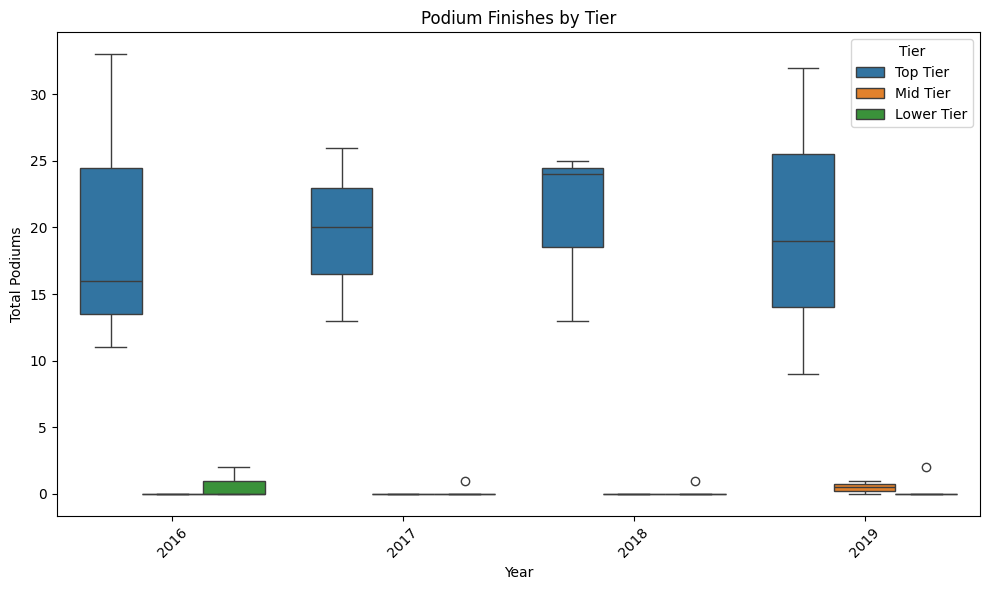

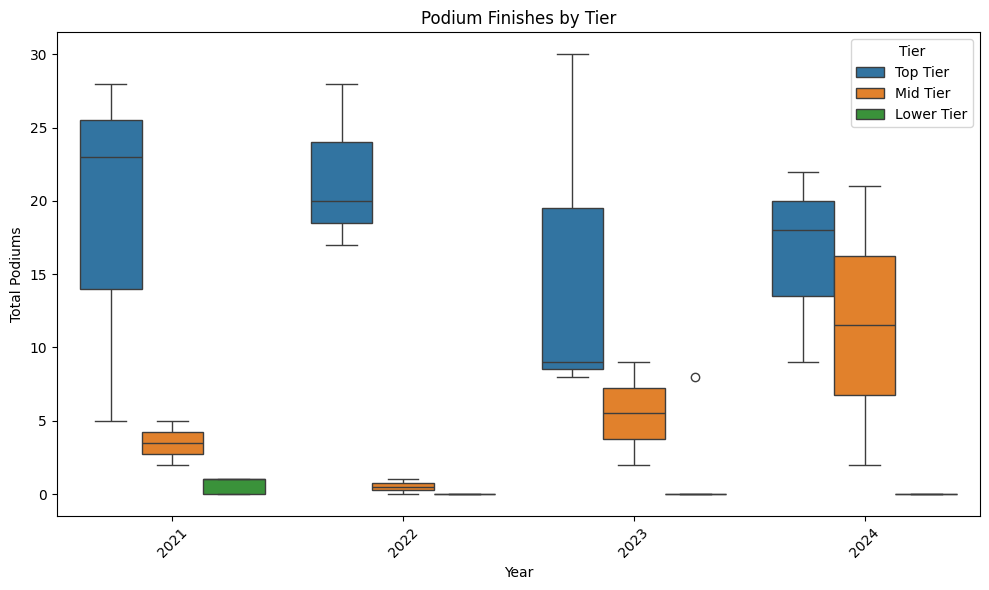

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pre_cap_df, x='year', y='Total Podiums', hue='Tier', palette=tier_colors, hue_order=tier_order)
plt.title('Podium Finishes by Tier')
plt.xlabel('Year')
plt.ylabel('Total Podiums')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=post_cap_df, x='year', y='Total Podiums', hue='Tier',palette=tier_colors, hue_order=tier_order)
plt.title('Podium Finishes by Tier')
plt.xlabel('Year')
plt.ylabel('Total Podiums')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

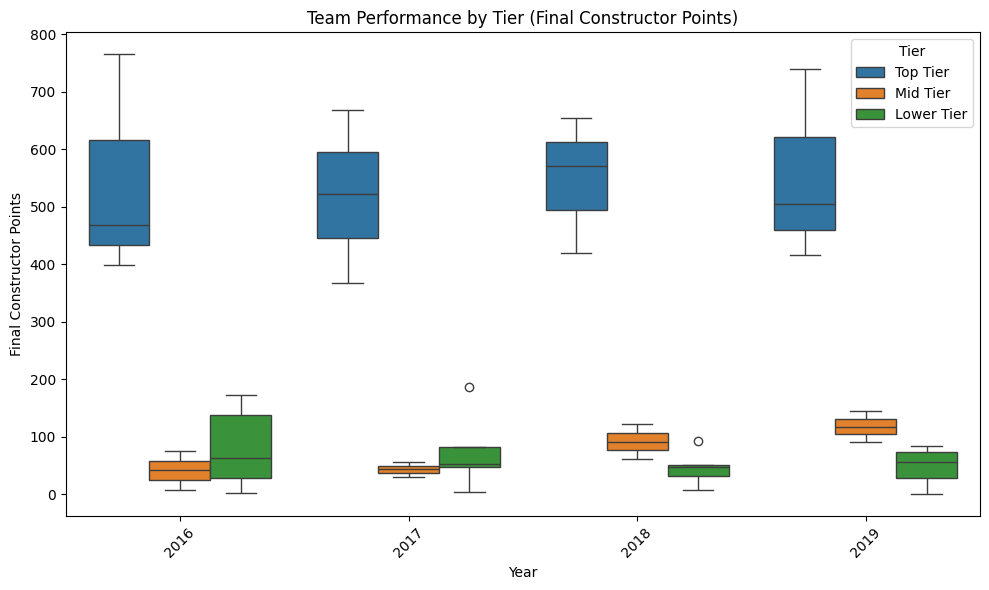

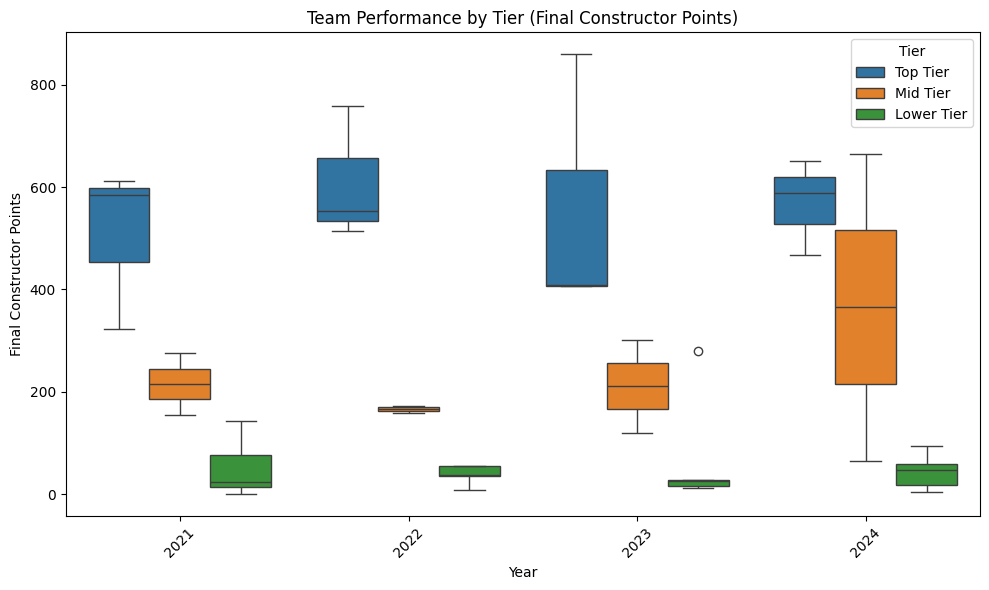

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pre_cap_df, x='year', y='Final Constructor Points', hue='Tier',palette=tier_colors, hue_order=tier_order)
plt.title('Team Performance by Tier (Final Constructor Points)')
plt.xlabel('Year')
plt.ylabel('Final Constructor Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=post_cap_df, x='year', y='Final Constructor Points', hue='Tier',palette=tier_colors, hue_order=tier_order)
plt.title('Team Performance by Tier (Final Constructor Points)')
plt.xlabel('Year')
plt.ylabel('Final Constructor Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

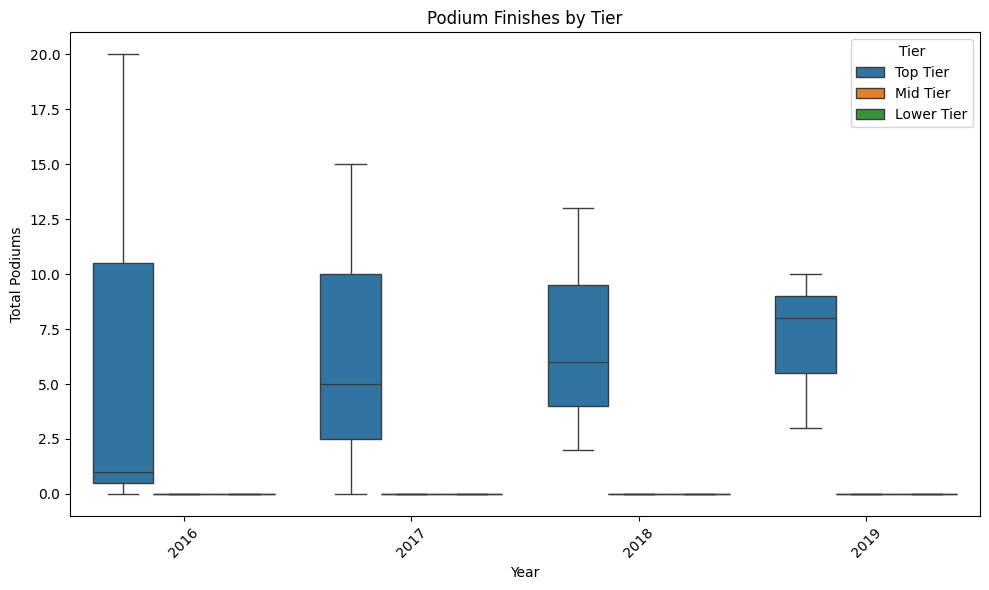

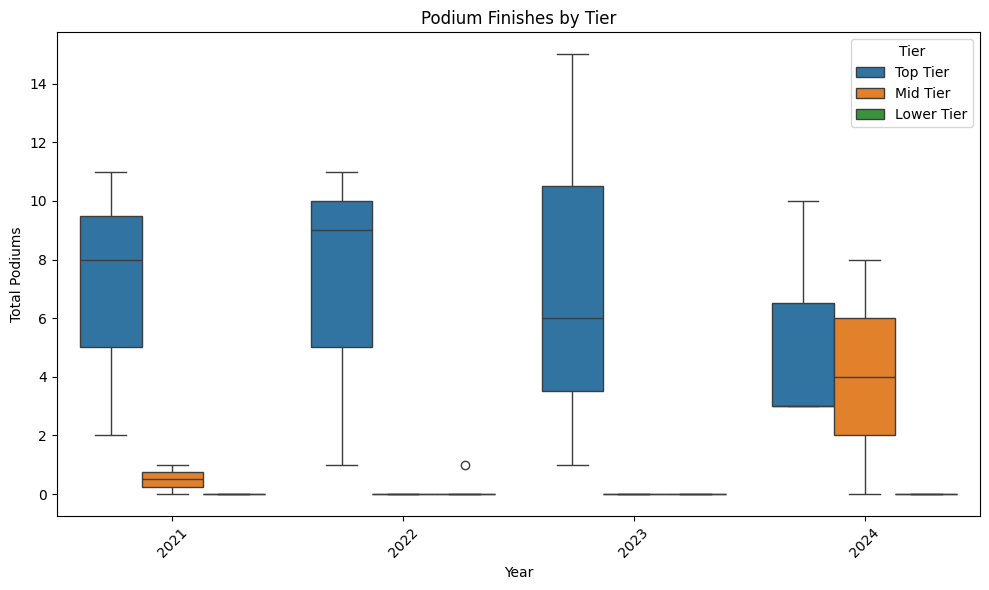

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pre_cap_df, x='year', y='Total Pole Positions', hue='Tier', palette=tier_colors, hue_order=tier_order)
plt.title('Podium Finishes by Tier')
plt.xlabel('Year')
plt.ylabel('Total Podiums')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=post_cap_df, x='year', y='Total Pole Positions', hue='Tier',palette=tier_colors, hue_order=tier_order)
plt.title('Podium Finishes by Tier')
plt.xlabel('Year')
plt.ylabel('Total Podiums')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

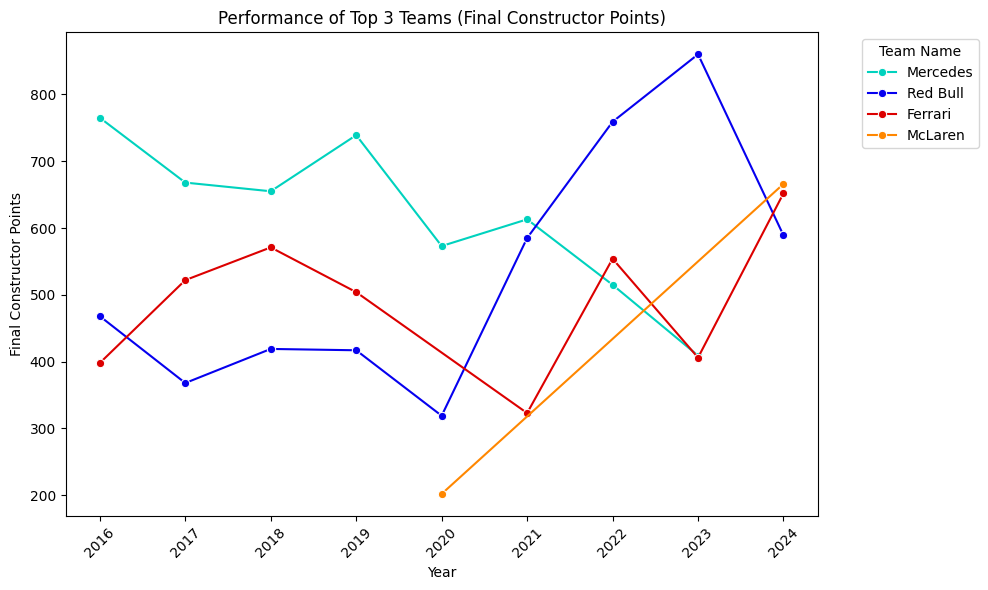

In [37]:
top_teams = df[df['Final Position in Constructor Standings'] <= 3]

plt.figure(figsize=(10, 6))
sns.lineplot(data=top_teams, x='year', y='Final Constructor Points', hue='Team Name', marker='o', palette=team_colors)
plt.title('Performance of Top 3 Teams (Final Constructor Points)')
plt.xlabel('Year')
plt.ylabel('Final Constructor Points')
plt.xticks(rotation=45)
plt.legend(title='Team Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

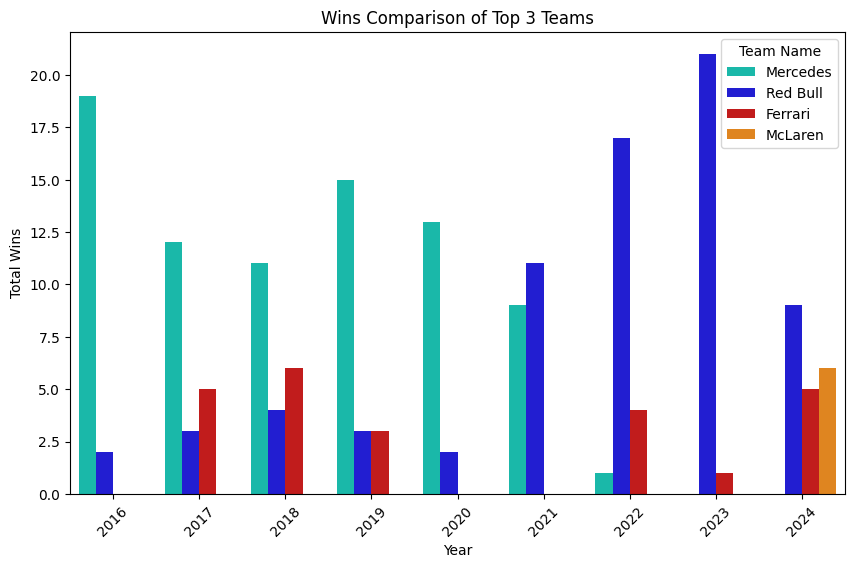

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_teams, x='year', y='Final Constructor Wins', hue='Team Name', palette=team_colors)
plt.title('Wins Comparison of Top 3 Teams')
plt.xlabel('Year')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()

# __Summary__


The introduction of the F1 budget cap was intended to level the playing field by reducing the financial disparity between teams. Our analysis, however, suggests that while the cap has not yet fully achieved its goal of improving competition, there are subtle but promising signs that competitiveness is increasing.

In the 2021 season, we saw an extraordinary close battle between Mercedes and Red Bull, culminating in one of the most dramatic season finales in F1 history (yet). However, in the following two years competition took a step back, with Red Bull dominating both seasons, effectively dethroning Mercedes as the biggest force rather than creating true competition.
2024 however, showed a positive shift, with three teams(Red Bull, Ferrari, and McLaren) all fighting for the title. McLaren, historically an underdog in the post-cap era, won the Constructors' Championship, marking a significant moment in recent Formula 1 history.

While the budget cap has not improved competition overnight, data suggests it has created more opportunities for the underdog teams to challenge at the top. The effects are not yet drastic, but trends like the 2024 season’s three-horse race, the slight reduction in dominance gaps, and McLaren’s unexpected success suggest that the cost cap is moving things in the right direction. However, long-term analysis is needed to determine if these trends will continue or if the main teams will adapt and find new ways to retain their prestige.